In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('./deeplearning.mplstyle')

In [3]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [4]:
print(f"x_train: {x_train}, y_train: {y_train}")

x_train: [1. 2.], y_train: [300. 500.]


In [5]:
print(f"x_train shape: {x_train.shape}")

x_train shape: (2,)


In [6]:
m = x_train.shape[0]
print(f"Training examples: {m}")

Training examples: 2


In [7]:
m = len(x_train)
print(f"Training examples: {m}")

Training examples: 2


In [8]:
i = 0
x_i = x_train[i]
y_i = y_train[i]
print(f"{x_i}, {y_i}")

1.0, 300.0


Text(0, 0.5, 'Price (in 1000s USD)')

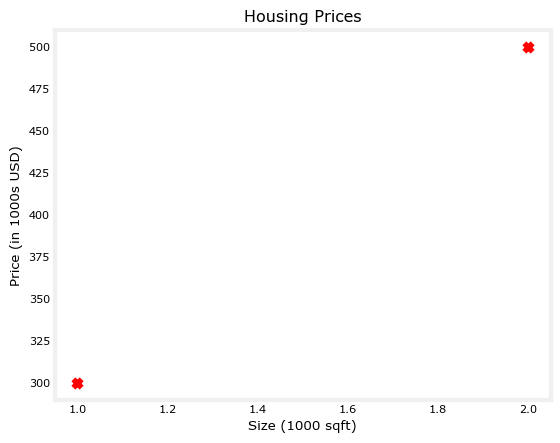

In [9]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Housing Prices")
plt.xlabel("Size (1000 sqft)")
plt.ylabel("Price (in 1000s USD)")

In [10]:
w = 100
b = 100
print(f"w: {w}, b: {b}")

w: 100, b: 100


In [11]:
def compute_output(x, w, b):
    m = x.shape[0]
    fx = np.zeros(m)
    for i in range(m):
        fx[i] = w * x[i] + b
    return fx


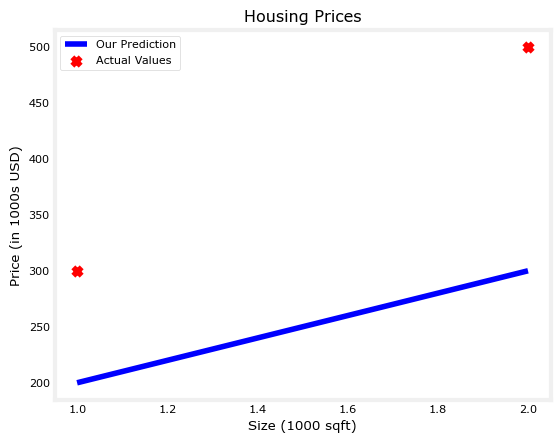

In [12]:
f_wb = compute_output(x_train, w, b,)

plt.plot(x_train, f_wb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title("Housing Prices")
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s USD)')
plt.legend()
plt.show()

In [13]:
w = 200
b = 100
print(f"w: {w}, b: {b}")

w: 200, b: 100


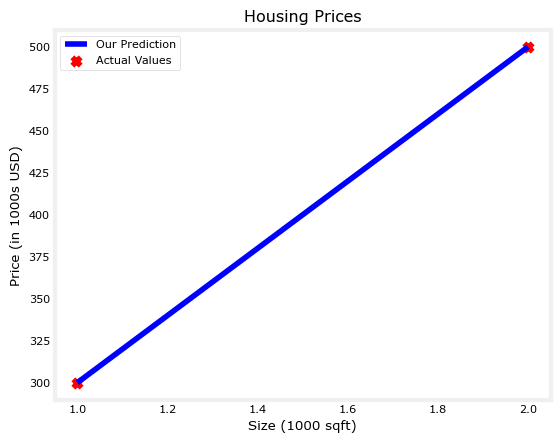

In [14]:
f_wb = compute_output(x_train, w, b,)

plt.plot(x_train, f_wb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title("Housing Prices")
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s USD)')
plt.legend()
plt.show()

In [15]:
w = 200
b = 100
x_i = 1.5
cost_1500_sqft = w * x_i + b

print(f"${cost_1500_sqft:.0f} thousand dollars")

$400 thousand dollars


# Lab: Cost Function with Contour & Soup Bowl Plots

In [16]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec

dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0';
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
n_bin = 5
dlcm = LinearSegmentedColormap.from_list(
        'dl_map', dlcolors, N=n_bin)

In [17]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

In [18]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter
    Returns
      cost (scalar)    : cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i],w) + b           #(n,)(n,)=scalar
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/(2*m)
    return cost

In [19]:
def mk_cost_lines(x,y,w,b, ax):
    ''' makes vertical cost lines'''
    cstr = "cost = (1/m)*("
    ctot = 0
    label = 'cost for point'
    addedbreak = False
    for p in zip(x,y):
        f_wb_p = w*p[0]+b
        c_p = ((f_wb_p - p[1])**2)/2
        c_p_txt = c_p
        ax.vlines(p[0], p[1],f_wb_p, lw=3, color=dlpurple, ls='dotted', label=label)
        label='' #just one
        cxy = [p[0], p[1] + (f_wb_p-p[1])/2]
        ax.annotate(f'{c_p_txt:0.0f}', xy=cxy, xycoords='data',color=dlpurple,
            xytext=(5, 0), textcoords='offset points')
        cstr += f"{c_p_txt:0.0f} +"
        if len(cstr) > 38 and addedbreak is False:
            cstr += "\n"
            addedbreak = True
        ctot += c_p
    ctot = ctot/(len(x))
    cstr = cstr[:-1] + f") = {ctot:0.0f}"
    ax.text(0.15,0.02,cstr, transform=ax.transAxes, color=dlpurple)

In [20]:
def plt_house_x(X, y,f_wb=None, ax=None):
    ''' plot house with aXis '''
    if not ax:
        fig, ax = plt.subplots(1,1)
    ax.scatter(X, y, marker='x', c='r', label="Actual Value")

    ax.set_title("Housing Prices")
    ax.set_ylabel('Price (in 1000s of dollars)')
    ax.set_xlabel(f'Size (1000 sqft)')
    if f_wb is not None:
        ax.plot(X, f_wb,  c=dlblue, label="Our Prediction")
    ax.legend()

In [21]:
def plt_stationary(x_train, y_train):
    # setup figure
    fig = plt.figure( figsize=(9,8))
    #fig = plt.figure(constrained_layout=True,  figsize=(12,10))
    fig.set_facecolor('#ffffff') #white
    fig.canvas.toolbar_position = 'top'
    #gs = GridSpec(2, 2, figure=fig, wspace = 0.01)
    gs = GridSpec(2, 2, figure=fig)
    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, :],  projection='3d')
    ax = np.array([ax0,ax1,ax2])

    #setup useful ranges and common linspaces
    w_range = np.array([200-300.,200+300])
    b_range = np.array([50-300., 50+300])
    b_space  = np.linspace(*b_range, 100)
    w_space  = np.linspace(*w_range, 100)

    # get cost for w,b ranges for contour and 3D
    tmp_b,tmp_w = np.meshgrid(b_space,w_space)
    z=np.zeros_like(tmp_b)
    for i in range(tmp_w.shape[0]):
        for j in range(tmp_w.shape[1]):
            z[i,j] = compute_cost(x_train, y_train, tmp_w[i][j], tmp_b[i][j] )
            if z[i,j] == 0: z[i,j] = 1e-6

    w0=200;b=-100    #initial point
    ### plot model w cost ###
    f_wb = np.dot(x_train,w0) + b
    mk_cost_lines(x_train,y_train,w0,b,ax[0])
    plt_house_x(x_train, y_train, f_wb=f_wb, ax=ax[0])

    ### plot contour ###
    CS = ax[1].contour(tmp_w, tmp_b, np.log(z),levels=12, linewidths=2, alpha=0.7,colors=dlcolors)
    ax[1].set_title('Cost(w,b)')
    ax[1].set_xlabel('w', fontsize=10)
    ax[1].set_ylabel('b', fontsize=10)
    ax[1].set_xlim(w_range) ; ax[1].set_ylim(b_range)
    cscat  = ax[1].scatter(w0,b, s=100, color=dlblue, zorder= 10, label="cost with \ncurrent w,b")
    chline = ax[1].hlines(b, ax[1].get_xlim()[0],w0, lw=4, color=dlpurple, ls='dotted')
    cvline = ax[1].vlines(w0, ax[1].get_ylim()[0],b, lw=4, color=dlpurple, ls='dotted')

    #Surface plot of the cost function J(w,b)
    ax[2].plot_surface(tmp_w, tmp_b, z,  cmap = dlcm, alpha=0.3, antialiased=True)
    ax[2].plot_wireframe(tmp_w, tmp_b, z, color='k', alpha=0.1)
    plt.xlabel("$w$")
    plt.ylabel("$b$")
    ax[2].zaxis.set_rotate_label(False)
    ax[2].xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[2].yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[2].zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[2].set_zlabel("J(w, b)\n\n", rotation=90)
    ax[2].view_init(30, -120)

    return fig,ax, [cscat, chline, cvline]

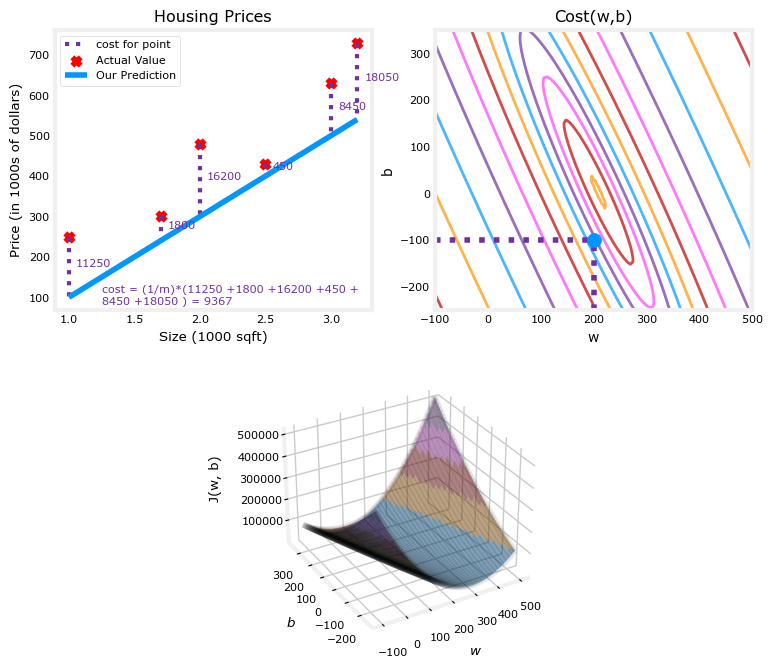

In [22]:
plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)